In [2]:
import vtk
from IPython.display import Image

In [3]:
def vtk_show(renderer, width=400, height=300):
    """
    Takes vtkRenderer instance and returns an IPython Image with the rendering.
    """
    renderWindow = vtk.vtkRenderWindow()
    renderWindow.SetOffScreenRendering(1)
    renderWindow.AddRenderer(renderer)
    renderWindow.SetSize(width, height)
    renderWindow.Render()
     
    windowToImageFilter = vtk.vtkWindowToImageFilter()
    windowToImageFilter.SetInput(renderWindow)
    windowToImageFilter.Update()
     
    writer = vtk.vtkPNGWriter()
    writer.SetWriteToMemory(1)
    writer.SetInputConnection(windowToImageFilter.GetOutputPort())
    writer.Write()
    data = str(buffer(writer.GetResult()))
    
    return Image(data)

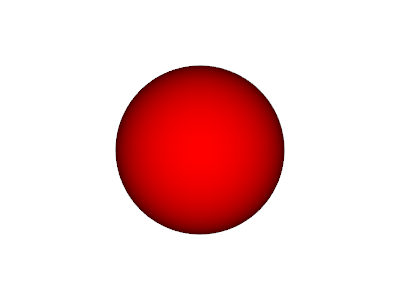

In [4]:
VtkSourceSphere = vtk.vtkSphereSource()
VtkSourceSphere.SetCenter(0.0, 0.0, 0.0)
VtkSourceSphere.SetRadius(10.0)
VtkSourceSphere.SetPhiResolution(360)
VtkSourceSphere.SetThetaResolution(360)

VtkMapperSphere = vtk.vtkPolyDataMapper()
VtkMapperSphere.SetInputConnection(VtkSourceSphere.GetOutputPort())

VtkActorSphere = vtk.vtkActor()
VtkActorSphere.SetMapper(VtkMapperSphere)
VtkActorSphere.GetProperty().SetColor(1.0, 0.0, 0.0)

VtkRenderer = vtk.vtkRenderer()
VtkRenderer.SetBackground(1.0, 1.0, 1.0)
VtkRenderer.AddActor(VtkActorSphere)

vtk_show(VtkRenderer)